# **Innovation Women - Business Analysis**

## Introduction

This notebook serves as the foundation of our business challenge for Innovation Women. Its objective is to prepare, explore, and understand the available data to inform and support two strategic recommendations:

1. *Increasing Net Cash Flow* through a new bundled offer strategy. (See Notebook 2)
2. *Enhancing Customer Experience* by improving the relevance and personalization of event-speaker matching. (See Notebook 1 and Business Report)

We begin by importing and cleaning the raw data from multiple sources: user profiles, events, and speaker by industries. This is followed by a structured exploratory data analysis (EDA) to uncover key insights about user behavior, platform engagement, and current subscription trends.

In addition to data preparation, this notebook provides a high-level analysis of Innovation Women’s user base and platform dynamics. We aim to identify correlations and usage patterns that will later support our proposed business strategies in the second notebook.

This analytical groundwork ensures that all future recommendations are not only data-informed, but also grounded in the operational realities of the platform.

# 1. User Information and Analysis

## 1.1 Data loading & cleaning

Objective: Import and Clean data (dates, duplicates, missing values)

### Get general information about the speaker dataset

In [2]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df_speaker = pd.read_csv('IWbackend2015_2025.csv')

In [37]:
# Display the first 5 rows of the dataset
df_speaker.head()

,Id,First name,Last name,Current sign in at,Title,Company,Location,Old location,Linkedin,Twitter,...,Undergrad,Signed up as speaker,Is speaker,Planner,Speaker,Expiration date,Subscription status,Topics,Referral type,Referral name
0,18972,Amy,Knoell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,FALSE,yes,no,none,NaN,NaN,Referral from a friend,Lisa Saurs
1,18971,luis,galia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,FALSE,yes,no,none,NaN,NaN,Online search engine,NaN
2,18970,Hector,Rivero,2025-03-27 02:50:09 UTC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,FALSE,yes,no,none,NaN,NaN,Online search engine,NaN
3,18969,alex,brownn,2025-03-27 02:39:36 UTC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,FALSE,yes,no,none,NaN,NaN,Event,NaN
4,18968,Angie,Cox,2025-03-27 02:33:16 UTC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,stripe,yes,yes,2026-03-27 02:35:16 UTC,active,NaN,Referral from a friend,Anne Ryan


In [38]:
# Display the size of the dataset
df_speaker.shape

(17514, 29)

In [39]:
# Display some information about the dataset
df_speaker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17514 entries, 0 to 17513
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    17514 non-null  int64  
 1   First name            17514 non-null  object 
 2   Last name             17514 non-null  object 
 3   Current sign in at    14890 non-null  object 
 4   Title                 5508 non-null   object 
 5   Company               5453 non-null   object 
 6   Location              5875 non-null   object 
 7   Old location          2055 non-null   object 
 8   Linkedin              5462 non-null   object 
 9   Twitter               2606 non-null   object 
 10  Website               4751 non-null   object 
 11  Blog url              2284 non-null   object 
 12  Created at            17514 non-null  object 
 13  Updated at            17514 non-null  object 
 14  Picture file name     5622 non-null   object 
 15  Picture content typ

In [40]:
# Display statistics information
df_speaker.describe()

,Id,Picture file size
count,17514.000000,5.622000e+03
mean,9391.368619,1.792935e+06
std,5524.830474,3.261245e+06
min,1.000000,3.710000e+02
25%,4526.250000,1.419578e+05
50%,9428.500000,5.423600e+05
75%,14173.500000,1.865273e+06
max,18972.000000,4.210697e+07


### Data Cleaning and Preparation

In [41]:
# Check for duplicates
df_speaker.duplicated().sum()

np.int64(0)

No Duplicates

**Drop necessary column**

We are dropping these column as they are not useful for the analysis we will be doing.
We will perform analysis to determine:
- How many planner(not paying member) and how many speakers are in the dataset
- The subscription status of members to know if it is a regular or content creator subscription

In [42]:
# Drop specified columns
df_speaker = df_speaker.drop(columns=['First name', 'Last name', 'Title', 'Company', 'Location', 'Old location', 'Linkedin', 'Twitter', 'Website', 'Blog url', 'Picture file name', 'Picture content type', 'Picture file size', 'Picture updated at', 'Graduate', 'Undergrad', 'Topics'])

In [43]:
# View the head of the dataframe to check the changes
df_speaker.head()

,Id,Current sign in at,Created at,Updated at,Signed up as speaker,Is speaker,Planner,Speaker,Expiration date,Subscription status,Referral type,Referral name
0,18972,NaN,2025-03-27 12:52:24 UTC,2025-03-27 12:52:24 UTC,True,FALSE,yes,no,none,NaN,Referral from a friend,Lisa Saurs
1,18971,NaN,2025-03-27 02:55:47 UTC,2025-03-27 02:55:47 UTC,True,FALSE,yes,no,none,NaN,Online search engine,NaN
2,18970,2025-03-27 02:50:09 UTC,2025-03-27 02:49:29 UTC,2025-03-27 02:50:09 UTC,False,FALSE,yes,no,none,NaN,Online search engine,NaN
3,18969,2025-03-27 02:39:36 UTC,2025-03-27 02:39:06 UTC,2025-03-27 02:43:55 UTC,True,FALSE,yes,no,none,NaN,Event,NaN
4,18968,2025-03-27 02:33:16 UTC,2025-03-27 02:32:31 UTC,2025-03-27 02:35:24 UTC,True,stripe,yes,yes,2026-03-27 02:35:16 UTC,active,Referral from a friend,Anne Ryan


**Checking for null values in the dataset**

Check for missing values in each column

In [44]:
# check missing value
df_speaker.isnull().sum()

,0
Id,0
Current sign in at,2624
Created at,0
Updated at,0
Signed up as speaker,0
Is speaker,28
Planner,0
Speaker,0
Expiration date,0
Subscription status,10174


There are null values in the subscription status, referral type, referral name and current sign in at column.

We will replace the null value in the subscription status, referral type, referral name with 'Not provided'.
Although the null values in the columns are a lot, but we are guessing that this is because they just started tracking this information recently so an analysis to know how this features are doing will be useful.

For the current sign in column, we will replace it with the value in the updated at column. There are no data available for this so we are assuming that the last time the member updated their account is the last time they signed in to their count.
We need to fill this column so that numeric analysis can still be performed on the column and see how often members sign-in.


In [46]:
# Convert columns to datetime format
df_speaker['Current sign in at'] = pd.to_datetime(df_speaker['Current sign in at'], errors='coerce')
df_speaker['Updated at'] = pd.to_datetime(df_speaker['Updated at'])

# Fill empty values in 'current_sign_in_at' with values from 'Updated at'
df_speaker['Current sign in at'] = df_speaker['Current sign in at'].fillna(df_speaker['Updated at'])

print(df_speaker)

          Id        Current sign in at               Created at  \
0      18972 2025-03-27 12:52:24+00:00  2025-03-27 12:52:24 UTC   
1      18971 2025-03-27 02:55:47+00:00  2025-03-27 02:55:47 UTC   
2      18970 2025-03-27 02:50:09+00:00  2025-03-27 02:49:29 UTC   
3      18969 2025-03-27 02:39:36+00:00  2025-03-27 02:39:06 UTC   
4      18968 2025-03-27 02:33:16+00:00  2025-03-27 02:32:31 UTC   
...      ...                       ...                      ...   
17509      5 2024-12-13 17:29:08+00:00  2015-05-01 16:24:30 UTC   
17510      4 2018-03-29 14:58:36+00:00  2015-05-01 16:23:34 UTC   
17511      3 2019-12-19 18:34:40+00:00  2015-05-01 16:21:52 UTC   
17512      2 2015-05-01 17:18:35+00:00  2015-05-01 16:21:37 UTC   
17513      1 2025-03-27 16:39:13+00:00  2015-05-01 16:20:53 UTC   

                     Updated at  Signed up as speaker  Is speaker Planner  \
0     2025-03-27 12:52:24+00:00                  True       FALSE     yes   
1     2025-03-27 02:55:47+00:00          

In [47]:
# Replace null values with specified values
df_speaker['Subscription status'] = df_speaker['Subscription status'].fillna('Not provided')
df_speaker['Referral type'] = df_speaker['Referral type'].fillna('Not provided')
df_speaker['Referral name'] = df_speaker['Referral name'].fillna('Not provided')
df_speaker['Is speaker'] = df_speaker['Is speaker'].fillna('Not provided')

In [48]:
# Confirming to see if the null value has been removed
df_speaker.isnull().sum()

,0
Id,0
Current sign in at,0
Created at,0
Updated at,0
Signed up as speaker,0
Is speaker,0
Planner,0
Speaker,0
Expiration date,0
Subscription status,0


In [49]:
# Checking the columns to see if they are in the exact datatypes needed for analysis
print(df_speaker.dtypes)

Id                                    int64
Current sign in at      datetime64[ns, UTC]
Created at                           object
Updated at              datetime64[ns, UTC]
Signed up as speaker                   bool
Is speaker                           object
Planner                              object
Speaker                              object
Expiration date                      object
Subscription status                  object
Referral type                        object
Referral name                        object
dtype: object


Most of the datatypes are in object format and this cannot aid analysis.
We will be checking for the unique values in some column to know what kind of datatypes to convert them to and how to represent them

In [50]:
# Get unique values for specified columns
columns_to_check = ['Is speaker', 'Planner', 'Speaker', 'Subscription status', 'Referral type']
unique_values = {col: df_speaker[col].unique() for col in columns_to_check}

# Print unique values
for col, values in unique_values.items():
    print(f"Unique values in {col}: {values}")


Unique values in Is speaker: ['FALSE' 'stripe' 'Not provided' 'enterprise']
Unique values in Planner: ['yes' 'no']
Unique values in Speaker: ['no' 'yes']
Unique values in Subscription status: ['Not provided' 'active' 'canceled' 'past_due' 'unpaid']
Unique values in Referral type: ['Referral from a friend' 'Online search engine' 'Event'
 'Link from another website' 'Social media' 'Podcast mention'
 'Not provided' 'Media mention']


Since the values under the planner or speaker column is either yes or no, we will be changing the datatype to boolean to allow for easy analysis

In [51]:
# Convert 'Planner' and 'Speaker' to Boolean
df_speaker['Planner'] = df_speaker['Planner'].map({'yes': True, 'no': False})
df_speaker['Speaker'] = df_speaker['Speaker'].map({'yes': True, 'no': False})

# Verify the changes
print(df_speaker[['Planner', 'Speaker']].dtypes)

Planner    bool
Speaker    bool
dtype: object


Used label encoding to categories subscription status, referral type and Is speaker so that it will be easy for us to get their frequencies and also do a correlation analysis.

In [52]:
from sklearn.preprocessing import LabelEncoder

# Initialize separate LabelEncoders for each column
encoder_subscription_status = LabelEncoder()
encoder_referral_type = LabelEncoder()
encoder_is_speaker = LabelEncoder()  # New encoder for 'Is speaker'

# Encode categorical columns separately
df_speaker['Subscription status'] = encoder_subscription_status.fit_transform(df_speaker['Subscription status'])
df_speaker['Referral type'] = encoder_referral_type.fit_transform(df_speaker['Referral type'])
df_speaker['Is speaker'] = encoder_is_speaker.fit_transform(df_speaker['Is speaker'])  # Apply to 'Is speaker'

# Display the encoding mappings for 'Subscription status'
print("Subscription status encoding mapping:")
print(dict(zip(encoder_subscription_status.classes_, range(len(encoder_subscription_status.classes_)))))

# Display the encoding mappings for 'Referral type'
print("Referral type encoding mapping:")
print(dict(zip(encoder_referral_type.classes_, range(len(encoder_referral_type.classes_)))))

# Display the encoding mappings for 'Is speaker'
print("Is speaker encoding mapping:")
print(dict(zip(encoder_is_speaker.classes_, range(len(encoder_is_speaker.classes_)))))


Subscription status encoding mapping:
{'Not provided': 0, 'active': 1, 'canceled': 2, 'past_due': 3, 'unpaid': 4}
Referral type encoding mapping:
{'Event': 0, 'Link from another website': 1, 'Media mention': 2, 'Not provided': 3, 'Online search engine': 4, 'Podcast mention': 5, 'Referral from a friend': 6, 'Social media': 7}
Is speaker encoding mapping:
{'FALSE': 0, 'Not provided': 1, 'enterprise': 2, 'stripe': 3}


Checking the datatpyes to see if it is now ready for analysis. 'Created at' and 'expiration date' are still in object datatype. we will be changing them to date datatype.

In [53]:
print(df_speaker.dtypes)

Id                                    int64
Current sign in at      datetime64[ns, UTC]
Created at                           object
Updated at              datetime64[ns, UTC]
Signed up as speaker                   bool
Is speaker                            int64
Planner                                bool
Speaker                                bool
Expiration date                      object
Subscription status                   int64
Referral type                         int64
Referral name                        object
dtype: object


In [54]:
# Change 'created at' to datetime format
df_speaker['Created at'] = pd.to_datetime(df_speaker['Created at'], errors='coerce')

In [55]:
# Step 1: Replace 'none' with NaT (Not a Time)
df_speaker['Expiration date'] = df_speaker['Expiration date'].replace('none', pd.NA)

# Convert to datetime, invalid formats will become NaT
df_speaker['Expiration date'] = pd.to_datetime(df_speaker['Expiration date'], errors='coerce')

In [56]:
print(df_speaker.dtypes)

Id                                    int64
Current sign in at      datetime64[ns, UTC]
Created at              datetime64[ns, UTC]
Updated at              datetime64[ns, UTC]
Signed up as speaker                   bool
Is speaker                            int64
Planner                                bool
Speaker                                bool
Expiration date         datetime64[ns, UTC]
Subscription status                   int64
Referral type                         int64
Referral name                        object
dtype: object


In [57]:
df_speaker.head()

,Id,Current sign in at,Created at,Updated at,Signed up as speaker,Is speaker,Planner,Speaker,Expiration date,Subscription status,Referral type,Referral name
0,18972,2025-03-27 12:52:24+00:00,2025-03-27 12:52:24+00:00,2025-03-27 12:52:24+00:00,True,0,True,False,NaT,0,6,Lisa Saurs
1,18971,2025-03-27 02:55:47+00:00,2025-03-27 02:55:47+00:00,2025-03-27 02:55:47+00:00,True,0,True,False,NaT,0,4,Not provided
2,18970,2025-03-27 02:50:09+00:00,2025-03-27 02:49:29+00:00,2025-03-27 02:50:09+00:00,False,0,True,False,NaT,0,4,Not provided
3,18969,2025-03-27 02:39:36+00:00,2025-03-27 02:39:06+00:00,2025-03-27 02:43:55+00:00,True,0,True,False,NaT,0,0,Not provided
4,18968,2025-03-27 02:33:16+00:00,2025-03-27 02:32:31+00:00,2025-03-27 02:35:24+00:00,True,3,True,True,2026-03-27 02:35:16+00:00,1,6,Anne Ryan


## 1.2 General Analysis

 ### How many planner(not paying members) and how many speakers(paying members) are in the dataset


In [58]:
# Count the number of True values in 'Planner' and 'Speaker' columns
planner_count = df_speaker['Planner'].sum()  # True counts as 1
speaker_count = df_speaker['Speaker'].sum()  # True counts as 1

# Calculate the percentage difference between planners and speakers
if speaker_count != 0:
    percent_more_planners = ((planner_count - speaker_count) / speaker_count) * 100
else:
    percent_more_planners = 0  # Avoid division by zero if there are no speakers

# Display the results
print(f"Number of Planners: {planner_count}")
print(f"Number of Speakers: {speaker_count}")
print(f"Percentage more planners than speakers: {percent_more_planners:.2f}%")

Number of Planners: 17265
Number of Speakers: 6537
Percentage more planners than speakers: 164.11%


There are 164.11% more planners than speakers.

### Number of logins in the past 1 year


In [59]:
# Manually create the datetime object for April 3rd, 2025 (timezone-aware in UTC)
current_date = pd.to_datetime('2025-04-03').tz_localize('UTC')

# Calculate the date one year ago from April 3rd, 2025
one_year_ago = current_date - pd.DateOffset(years=1)

# Ensure the 'Current sign in at' column is in datetime format
df_speaker['Current sign in at'] = pd.to_datetime(df_speaker['Current sign in at'], errors='coerce')

# If 'Current sign in at' is already timezone-aware, use tz_convert to ensure it's in UTC
if df_speaker['Current sign in at'].dt.tz is not None:
    df_speaker['Current sign in at'] = df_speaker['Current sign in at'].dt.tz_convert('UTC')

# Filter the rows where 'Current sign in at' is within the past one year
recent_sign_ins = df_speaker[df_speaker['Current sign in at'] >= one_year_ago]

# Display the filtered dataframe (sign-ins within the past year)
print(f"Number of sign-ins within the past year: {recent_sign_ins.shape[0]}")


Number of sign-ins within the past year: 4362


In [60]:
recent_sign_ins.head()

,Id,Current sign in at,Created at,Updated at,Signed up as speaker,Is speaker,Planner,Speaker,Expiration date,Subscription status,Referral type,Referral name
0,18972,2025-03-27 12:52:24+00:00,2025-03-27 12:52:24+00:00,2025-03-27 12:52:24+00:00,True,0,True,False,NaT,0,6,Lisa Saurs
1,18971,2025-03-27 02:55:47+00:00,2025-03-27 02:55:47+00:00,2025-03-27 02:55:47+00:00,True,0,True,False,NaT,0,4,Not provided
2,18970,2025-03-27 02:50:09+00:00,2025-03-27 02:49:29+00:00,2025-03-27 02:50:09+00:00,False,0,True,False,NaT,0,4,Not provided
3,18969,2025-03-27 02:39:36+00:00,2025-03-27 02:39:06+00:00,2025-03-27 02:43:55+00:00,True,0,True,False,NaT,0,0,Not provided
4,18968,2025-03-27 02:33:16+00:00,2025-03-27 02:32:31+00:00,2025-03-27 02:35:24+00:00,True,3,True,True,2026-03-27 02:35:16+00:00,1,6,Anne Ryan


### Number of planners (not paying members) and speakers (paying members) who logged in the the past 1 year

In [61]:
# Filter the rows where 'Current sign in at' is within the past one year
recent_sign_ins = df_speaker[df_speaker['Current sign in at'] >= one_year_ago]

# Count how many of the 'Speaker' values are True (Yes for speaker)
num_speakers = recent_sign_ins[recent_sign_ins['Speaker'] == True].shape[0]

# Count how many of the 'Planner' values are True (Yes for planner)
num_planners = recent_sign_ins[recent_sign_ins['Planner'] == True].shape[0]

# Display the results
print(f"Total recent sign-ins within the past year: {recent_sign_ins.shape[0]}")
print(f"Number of speakers in the past year: {num_speakers}")
print(f"Number of planners in the past year: {num_planners}")

Total recent sign-ins within the past year: 4362
Number of speakers in the past year: 3118
Number of planners in the past year: 4362


1244 people logged in in the last year are not paying and are just planners.

Recommendation: This people interact with the website frequently in the past one year meaning they are still interested in the services Innovation women has to offer. We advise that a discount off membership or training subscription could be sent to this people through the weekly newsletter.

### Correlation analysis to measure the relationship between 'Is speaker', 'Subscription status', 'Speaker', 'Planner'


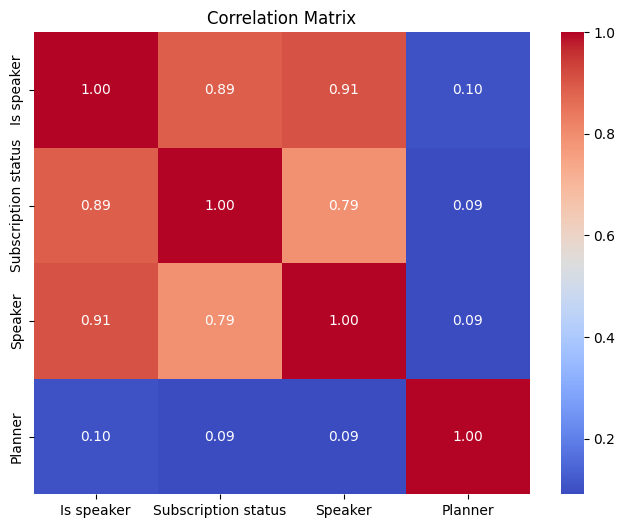

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns that can be used for correlation
correlation_columns = [ 'Is speaker', 'Subscription status', 'Speaker', 'Planner']

# Calculate the correlation matrix
correlation_matrix = df_speaker[correlation_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

There is a low correlation of 0.09 between Planner and Speaker and this confirms that planners are people using the website for free and not paying for a subscription as only people who pay for any subscription are classified as speakers.


There is an high correlation of 0.79 between Speaker and subscription status and this confirms that a speaker is someone who is paying the mebership fee altough the subscription status might be active, cancelled, unpaid or due.


There is a high correlation between Speaker and Is Speaker because speaker is everyone paying for membership and Is speaker is the column that classifies if it is a regular membership, a content creator membership, or an enterprise.

### The most channel through which people hear about Innovation Women

<ipython-input-74-c69d019e002a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=referral_type_counts.index, y=referral_type_counts.values, palette="viridis")


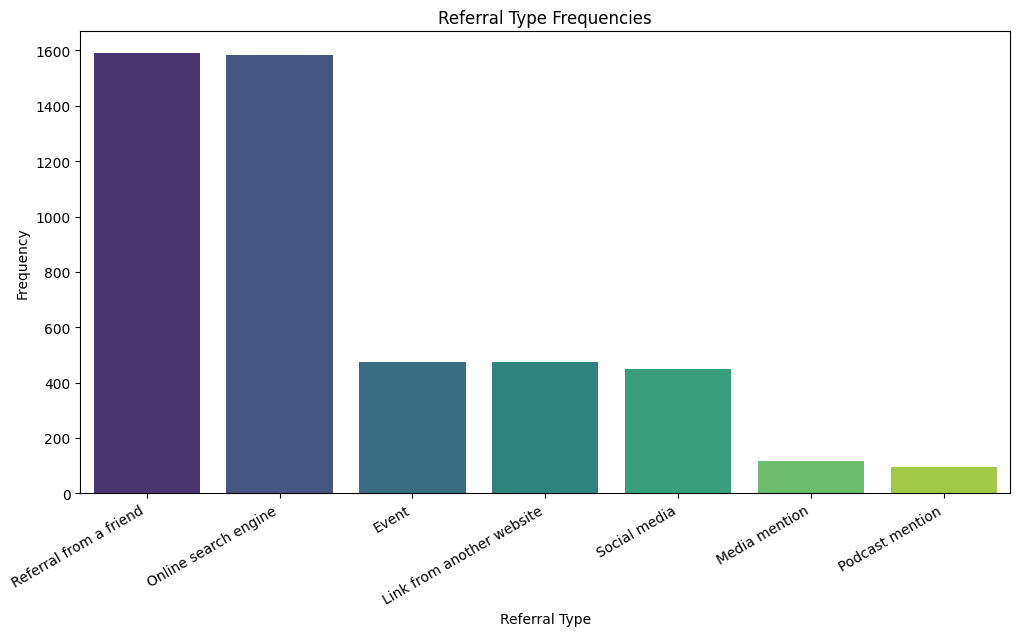

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reverse the Label Encoding for 'Referral Type'
df_speaker['Referral type'] = encoder_referral_type.inverse_transform(df_speaker['Referral type'])

# Remove "Not provided" values
df_filtered = df_speaker[df_speaker['Referral type'] != 'Not provided']

# Get the value counts of 'Referral Type' (excluding "Not provided")
referral_type_counts = df_filtered['Referral type'].value_counts()

# Plot the frequencies using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=referral_type_counts.index, y=referral_type_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Referral Type')
plt.ylabel('Frequency')
plt.title('Referral Type Frequencies')

# Rotate labels and ensure alignment
plt.xticks(rotation=30, ha="right")  # Rotate and align right for better readability

# Display the plot
plt.show()



In [72]:
# Exclude 'Not provided' and get value counts
referral_type_counts = df_speaker[df_speaker['Referral type'] != 'Not provided']['Referral type'].value_counts()

# Display the frequencies
print(referral_type_counts)


Referral type
Referral from a friend       1589
Online search engine         1584
Event                         473
Link from another website     473
Social media                  451
Media mention                 117
Podcast mention                97
Name: count, dtype: int64


Referral from a friend with 1589 counts and Online Search engine with 1584 are the means through which people get to know about innovation women the most.


Recommendation: Innovation women can introduce a referral system where members get rewarded when they refer other people.

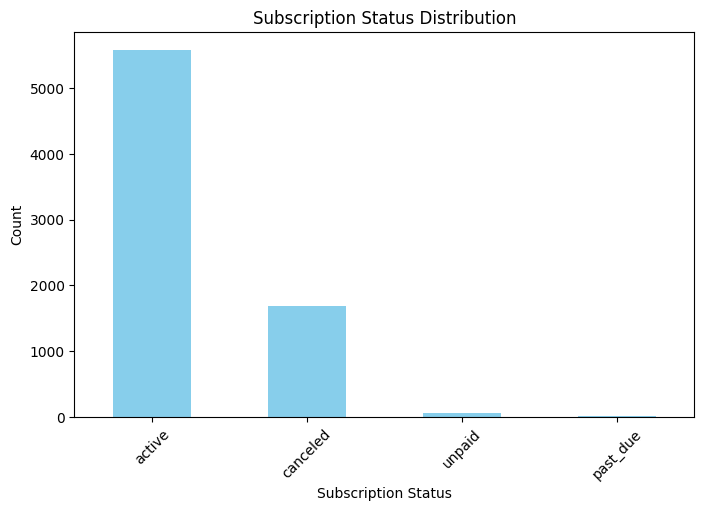

In [81]:
# Reverse the Label Encoding for 'Subscription status'
df_speaker['Subscription status'] = encoder_subscription_status.inverse_transform(df_speaker['Subscription status'])

import matplotlib.pyplot as plt

# Remove "Not provided" values before counting
subscription_status_counts = df_speaker[df_speaker['Subscription status'] != 'Not provided']['Subscription status'].value_counts()

# Plot the value counts in a bar chart
plt.figure(figsize=(8, 5))
subscription_status_counts.plot(kind='bar', color='skyblue', title='Subscription Status Distribution')

# Labels
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()


This chart shows that most of the users of Innovation women are currently active members although there are almost 2000 people who have cancelled their subscription

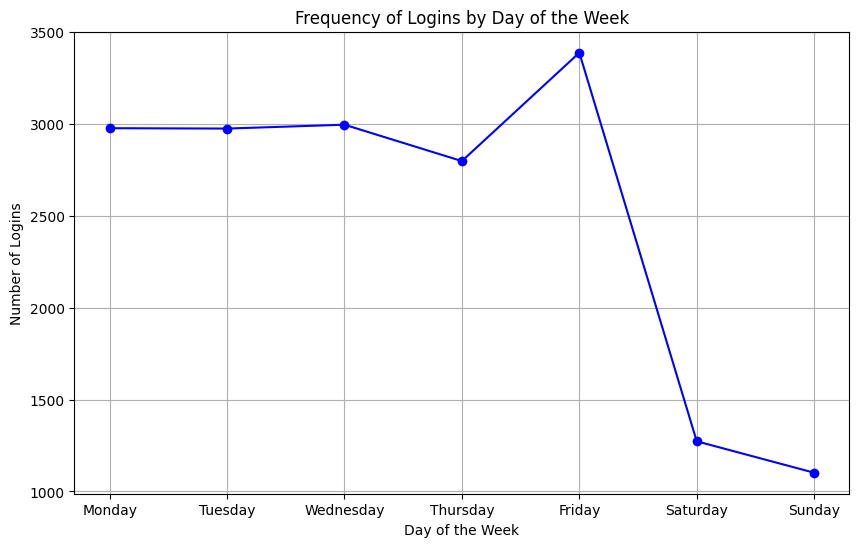

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df_speaker' is your DataFrame and 'Current sign in at' is a datetime column

# Convert 'Current sign in at' to datetime if not already done
df_speaker['Current sign in at'] = pd.to_datetime(df_speaker['Current sign in at'], errors='coerce')

# Extract the day of the week (0=Monday, 6=Sunday)
df_speaker['Day of Week'] = df_speaker['Current sign in at'].dt.dayofweek

# Count the number of logins per day of the week
login_counts_by_day = df_speaker.groupby('Day of Week').size()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(login_counts_by_day.index, login_counts_by_day.values, marker='o', linestyle='-', color='b')
plt.title('Frequency of Logins by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Logins')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

Friday is the day people log into their account the most with very few people logging in on the weekend

#2. Events and Speaker by Industries Analysis

## 2.1 Data loading & cleaning

### Get general Information about the dataset

**Event dataset**

In [5]:
df_events = pd.read_csv('events-2025-04-01.csv')
df_speaker_by_industries = pd.read_csv('speaker-by-industries-2025-04-02.csv')

In [6]:
# Display the first 5 rows of the dataset
df_events.head()

,Id,Date,Name,Website,Price,Old location,Industry,Department,Description,Total length,...,Opportunity type,Audience,Location,Lat,Lng,Location object,Location type,Is private,Created at,Updated at
0,17916,2025-07-09 00:00:00 UTC,E-Fuels Summit 2025,https://www.e-fuels-summit.com/,NaN,NaN,Renewables and Environment,NaN,The E-Fuels Summit 2025 serves as the premier ...,NaN,...,Speaker or presenter,"Major e-fuel producers, powertrain developers,...","Houston, TX, USA",29.760077,-95.370111,"[{""long_name"":""Houston"",""short_name"":""Houston""...",In-Person,False,2025-03-27 13:14:52 UTC,2025-03-27 13:14:52 UTC
1,17915,2025-12-07 00:00:00 UTC,2025 ALERRT Conference,https://www.alerrtconference.org/,NaN,NaN,Law Enforcement,NaN,The Advanced Law Enforcement Rapid Response Tr...,NaN,...,Speaker or presenter,"First responders, law enforcement, fire, and E...","San Marcos, TX, USA",29.883275,-97.941394,"[{""long_name"":""San Marcos"",""short_name"":""San M...",In-Person,False,2025-03-27 12:58:20 UTC,2025-03-27 12:58:20 UTC
2,17914,2025-11-02 00:00:00 UTC,Lone Star State School Counselor Association C...,https://ncyionline.org/conferences/lssscac/,NaN,NaN,Mental Health Care,NaN,The Lone Star State School Counselor Associati...,NaN,...,Speaker or presenter,Counselors working with pre-K to postsecondary...,"Frisco, TX, USA",33.149672,-96.835567,"[{""long_name"":""Frisco"",""short_name"":""Frisco"",""...",In-Person,False,2025-03-27 12:54:50 UTC,2025-03-27 12:54:50 UTC
3,17913,2025-11-14 00:00:00 UTC,2025 TOTA Annual Conference,https://www.tota.org/2025-annual-conference,NaN,NaN,Hospital and Health Care,NaN,The Texas Occupational Therapy Association (TO...,NaN,...,Speaker or presenter,"Occupational therapists, occupational therapy ...","San Marcos, TX, USA",29.883275,-97.941394,"[{""long_name"":""San Marcos"",""short_name"":""San M...",In-Person,False,2025-03-27 12:47:14 UTC,2025-03-27 12:47:14 UTC
4,17912,2025-09-24 00:00:00 UTC,2025 NTBAA Safety Showdown,https://ntbaaonline.com/SafetyShowDown,NaN,NaN,Aviation & Aerospace,NaN,The North Texas Business Aviation Association ...,NaN,...,Speaker or presenter,"Local flight operations, manufacturers and ass...","Grapevine, TX, USA",32.939452,-97.078668,"[{""long_name"":""Grapevine"",""short_name"":""Grapev...",In-Person,False,2025-03-27 12:32:03 UTC,2025-03-27 12:32:03 UTC


In [7]:
# Display the first 5 rows of the dataset
df_speaker_by_industries.head()

,Industry,Total count
0,Not Specified,709
1,Professional Training and Coaching,245
2,Leadership,155
3,Women Empowerment,152
4,"Health, Wellness and Fitness",102


In [8]:
# Display the size of the dataset
df_events.shape

(16909, 25)

In [9]:
# Display the size of the dataset
df_speaker_by_industries.shape

(131, 2)

In [10]:
# Display some information about the dataset
df_events.info()
df_speaker_by_industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   16909 non-null  int64  
 1   Date                 16909 non-null  object 
 2   Name                 16909 non-null  object 
 3   Website              16729 non-null  object 
 4   Price                0 non-null      float64
 5   Old location         1180 non-null   object 
 6   Industry             16716 non-null  object 
 7   Department           0 non-null      float64
 8   Description          16861 non-null  object 
 9   Total length         0 non-null      float64
 10  Presentation length  0 non-null      float64
 11  Approved             16909 non-null  object 
 12  Featured             16909 non-null  bool   
 13  Deadline             16909 non-null  object 
 14  Apply to             16547 non-null  object 
 15  Opportunity type     16844 non-null 

In [11]:
# Display statistics information
df_events.describe()

,Id,Price,Department,Total length,Presentation length,Lat,Lng
count,16909.000000,0.0,0.0,0.0,0.0,13930.000000,13930.000000
mean,9113.364717,NaN,NaN,NaN,NaN,36.743646,-72.699589
std,5131.391839,NaN,NaN,NaN,NaN,12.440942,53.603482
min,5.000000,NaN,NaN,NaN,NaN,-54.801912,-159.784834
25%,4733.000000,NaN,NaN,NaN,NaN,33.150674,-99.081678
50%,9165.000000,NaN,NaN,NaN,NaN,38.833882,-84.508554
75%,13555.000000,NaN,NaN,NaN,NaN,42.331427,-75.165222
max,17916.000000,NaN,NaN,NaN,NaN,69.649205,176.237767


In [12]:
# Display statistics information
df_speaker_by_industries.describe()

,Total count
count,131.000000
mean,20.038168
std,69.131692
min,1.000000
25%,1.500000
50%,3.000000
75%,8.500000
max,709.000000


### Data Cleaning and Preparation

In [13]:
# check for duplicates
df_events.duplicated().sum()

np.int64(0)

In [14]:
# check for duplicates
df_speaker_by_industries.duplicated().sum()

np.int64(0)

No Duplicates

**Drop necessary column**

We are dropping these column as they are not useful for the analysis we will be doing.
We will perform analysis to determine:
- The most industry the updated events belong to
- The most industry our members belong to

In [15]:
# Strip any leading/trailing spaces from column names
df_events.columns = df_events.columns.str.strip()

# Now drop the specified columns
df_events = df_events.drop(columns=['Website', 'Price', 'Deadline', 'Featured', 'Approved', 'Presentation length', 'Total length',
                                    'Apply to', 'Department', 'Old location', 'Lat', 'Lng', 'Location object', 'Opportunity type', 'Location type', 'Is private', 'Description'], errors='ignore')

We drop columns only in the event dataset as there are two columns in the speakers by inddustries dataset and we need both columns

**Checking for null values in the dataset**

Check for missing values in each column

In [16]:
# check missing value
df_events.isnull().sum()

,0
Id,0
Date,0
Name,0
Industry,193
Audience,4911
Location,1249
Created at,0
Updated at,0


There are null values in the Industry, Audience and Location column.

We will replace the null value in the Audience and Location column with 'Not specified'.
We will replace the null values in the industry column with the most frequent industry as there are just 193 null values in this column and we believe it is too small to affect our analysis.


Although the null values in the columns are a lot, we pefer to keep them as dropping them can drop some important rows in the dataset.

In [17]:
# Replace null values with specified values
df_events['Industry'] = df_events['Industry'].fillna(df_events['Industry'].mode()[0])  # Replace with most frequent value
df_events['Audience'] = df_events['Audience'].fillna('Not specified')
df_events['Location'] = df_events['Location'].fillna('Not specified')

In [18]:
# check missing value
df_speaker_by_industries.isnull().sum()

,0
Industry,0
Total count,0


There are no missing values in speaker by industries dataset

In [19]:
# Checking the columns to see if they are in the exact datatypes needed for analysis
print(df_events.dtypes)

Id             int64
Date          object
Name          object
Industry      object
Audience      object
Location      object
Created at    object
Updated at    object
dtype: object


Some datatypes are in object format and this cannot aid analysis.
We will be changing the datatype to a more suitable datatype.

In [20]:
# Convert columns to datetime format
df_events['Date'] = pd.to_datetime(df_events['Date'], errors='coerce', utc=True)
df_events['Created at'] = pd.to_datetime(df_events['Created at'], errors='coerce', utc=True)
df_events['Updated at'] = pd.to_datetime(df_events['Updated at'], errors='coerce', utc=True)

# Check the data types after conversion
print(df_events.dtypes)

Id                          int64
Date          datetime64[ns, UTC]
Name                       object
Industry                   object
Audience                   object
Location                   object
Created at    datetime64[ns, UTC]
Updated at    datetime64[ns, UTC]
dtype: object


In [21]:
# Checking the columns to see if they are in the exact datatypes needed for analysis
print(df_speaker_by_industries.dtypes)

Industry       object
Total count     int64
dtype: object


The datatype for the speakers by industries dataset is in the right format for analysis

## 2.2 General Analysis

### Finding the top 10 most common Industries in the Events dataset and plotting its chart

<ipython-input-22-2adc4b855708>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.head(10).index, y=industry_counts.head(10).values, palette="viridis")


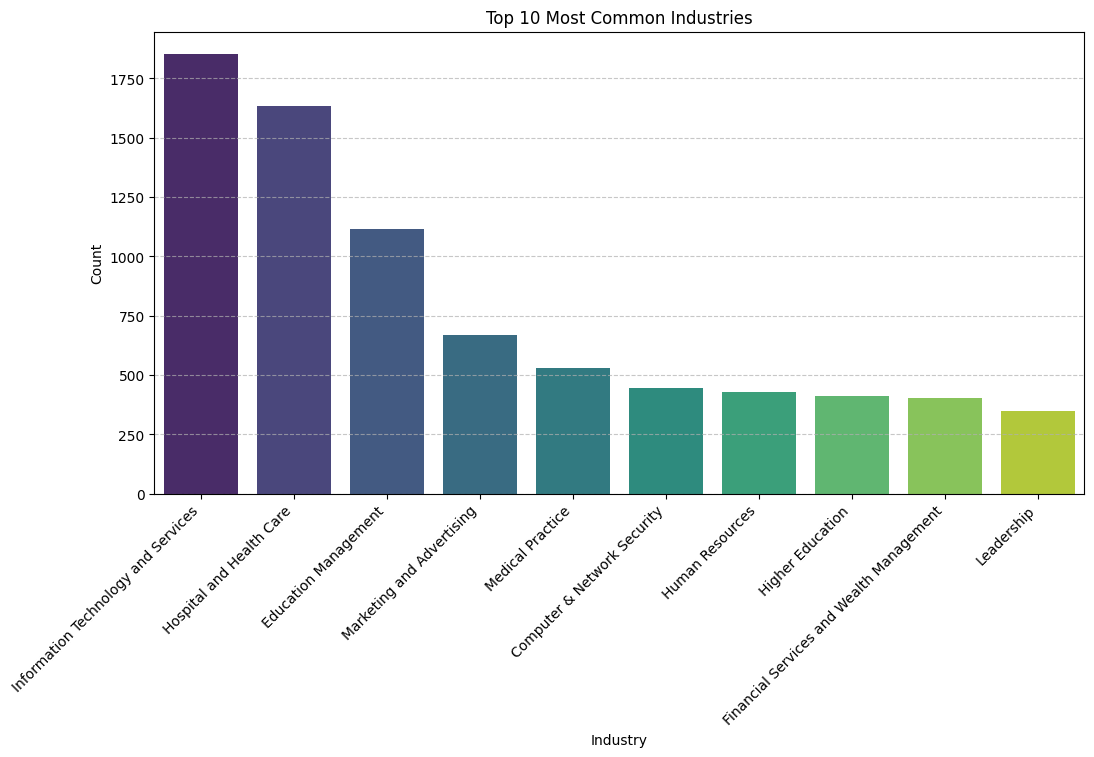

In [22]:
import seaborn as sns

# Count occurrences industry in the events dataset
industry_counts = df_events["Industry"].value_counts()

# Plot the top 10 industries as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.head(10).index, y=industry_counts.head(10).values, palette="viridis")

# Customize the chart
plt.xticks(rotation=45, ha='right')
plt.xlabel("Industry")
plt.ylabel("Count")
plt.title("Top 10 Most Common Industries")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Finding the top 10 most common Industries in the Speaker by Industries dataset and plotting its chart

<ipython-input-23-dcbc116e29d6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_totals.head(10).index, y=industry_totals.head(10).values, palette="viridis")


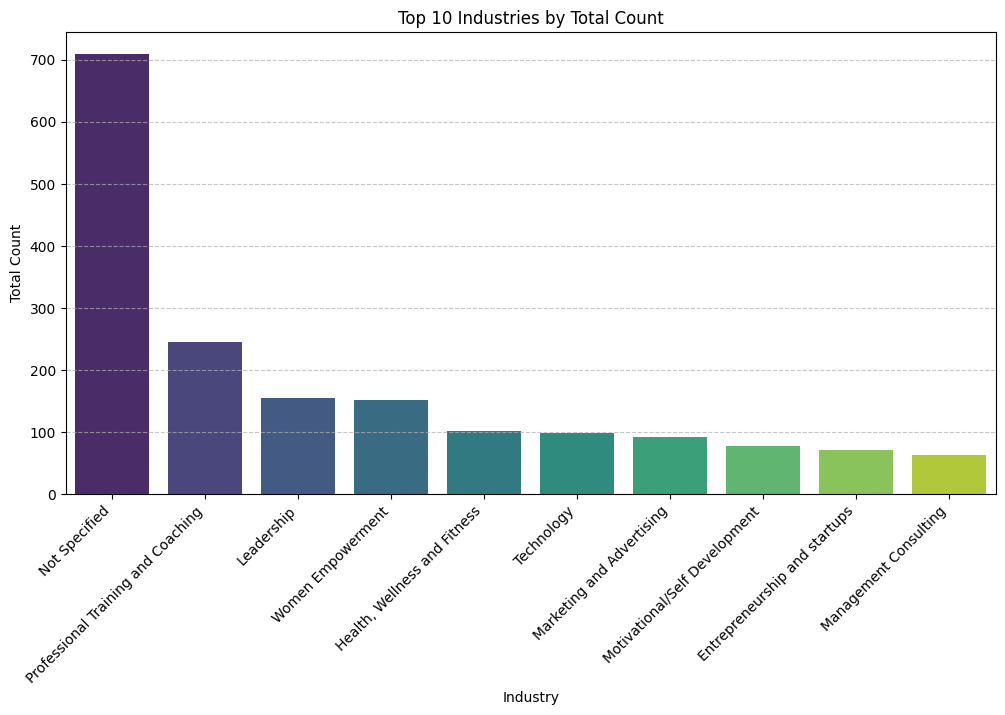

In [23]:
# Group by Industry and sum the Total count
industry_totals = df_speaker_by_industries.groupby("Industry")["Total count"].sum().sort_values(ascending=False)

# Plot the top 10 industries as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_totals.head(10).index, y=industry_totals.head(10).values, palette="viridis")

# Customize the chart
plt.xticks(rotation=45, ha='right')
plt.xlabel("Industry")
plt.ylabel("Total Count")
plt.title("Top 10 Industries by Total Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

Leadership, Technology, and Marketing & Advertising are event industries that rank among the top 10 in both the event and speaker industries. There are also more events in this industry than there are speakers in the industry and this means more events to go round members.
Some industrues like Entreprenuership and startups, Motivational/Self Development, Women empowerment, etc, are industries with the most members but the events in this industries are few.

# 3. Conclusion and Strategic Implications

This notebook provided a foundational analysis of Innovation Women's platform data, focusing on user segmentation, engagement behavior, and event-speaker alignment.

Key insights include:
- A high proportion of non-paying users (planners) compared to paying members (speakers and content creators).
- Moderate platform engagement: only a portion of users have logged in within the past year, indicating opportunities to increase retention.
- A positive correlation between user type, subscription status, and login activity — suggesting that targeted value propositions may convert more users to paying members.
- A mismatch between popular event industries and the dominant industries listed by speakers — revealing a need for better alignment.

These findings directly inform two strategic directions developed in this project:

1. *Enhancing the Customer Experience* (Notebook 1)  
   Based on observed friction points, we propose a personalized event recommendation system powered by data-driven matching and user profile enrichment. (see report BC3 -Report Team 4 - Innovation Women)
2. *Increasing Net Cash Flow* (Notebook 2)  
   Leveraging the loyalty effect of training cohorts, we simulate a new bundled pricing strategy combining training and membership. This model is shown to be financially viable, with a break-even point achieved at just 50 conversions (see Notebook 2).

Together, these strategies aim to maximize both platform value for users and revenue potential for the business. For financial modeling and strategic simulations, refer to *Notebook 2 – Financial Simulation* and the comprehensive written report in *BC3_Report.docx*.

Together, these strategies aim to maximize both platform value for users and revenue potential for the business. For financial modeling and strategic simulations, refer to *Notebook 2 – Financial Simulation* and the comprehensive written report in *BC3_Report.docx*.